# Prediction Decomposition

In this section, we will demonstrate how to visualize 

* time series forecasting
* predicted components 

by using the plotting utilities that come with the Orbit package.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import orbit
from orbit.models import DLT
from orbit.diagnostics.plot import plot_predicted_data,plot_predicted_components
from orbit.utils.dataset import load_iclaims

import warnings
warnings.filterwarnings('ignore')

In [2]:
print(orbit.__version__)

1.1.1dev


In [3]:
# load log-transformed data
df = load_iclaims()
train_df = df[df['week'] < '2017-01-01']
test_df = df[df['week'] >= '2017-01-01']

response_col = 'claims'
date_col = 'week'
regressor_col = ['trend.unemploy', 'trend.filling', 'trend.job']

## Fit a model

Here we use the `DLTFull` model as example.

In [4]:
dlt = DLT(
    response_col=response_col,
    regressor_col=regressor_col,
    date_col=date_col,
    seasonality=52,
    prediction_percentiles=[5, 95],
)

dlt.fit(train_df)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


## Plot Predictions

First, we do the prediction on the training data before the year 2017.

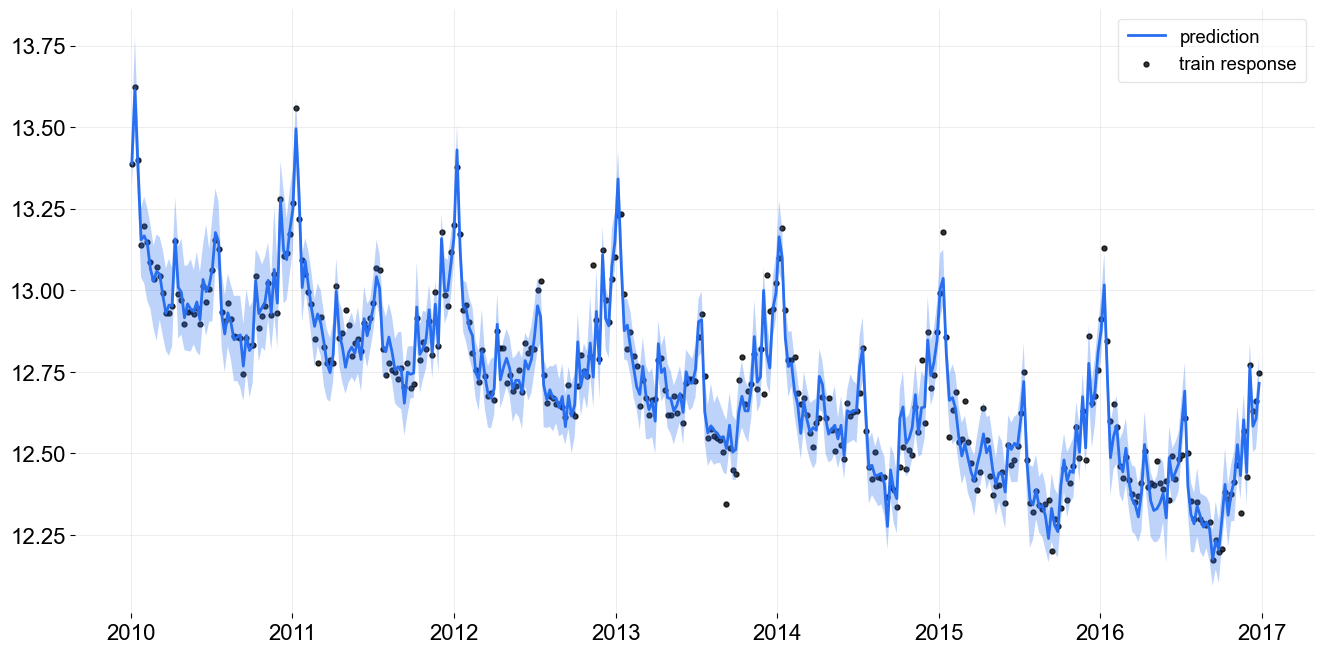

In [5]:
predicted_df = dlt.predict(df=train_df, decompose=True)

_ = plot_predicted_data(train_df, predicted_df, 
                        date_col=dlt.date_col, actual_col=dlt.response_col)

Next, we do the predictions on the test data after the year 2017. This plot is useful to help check the overall model performance on the out-of-sample period.

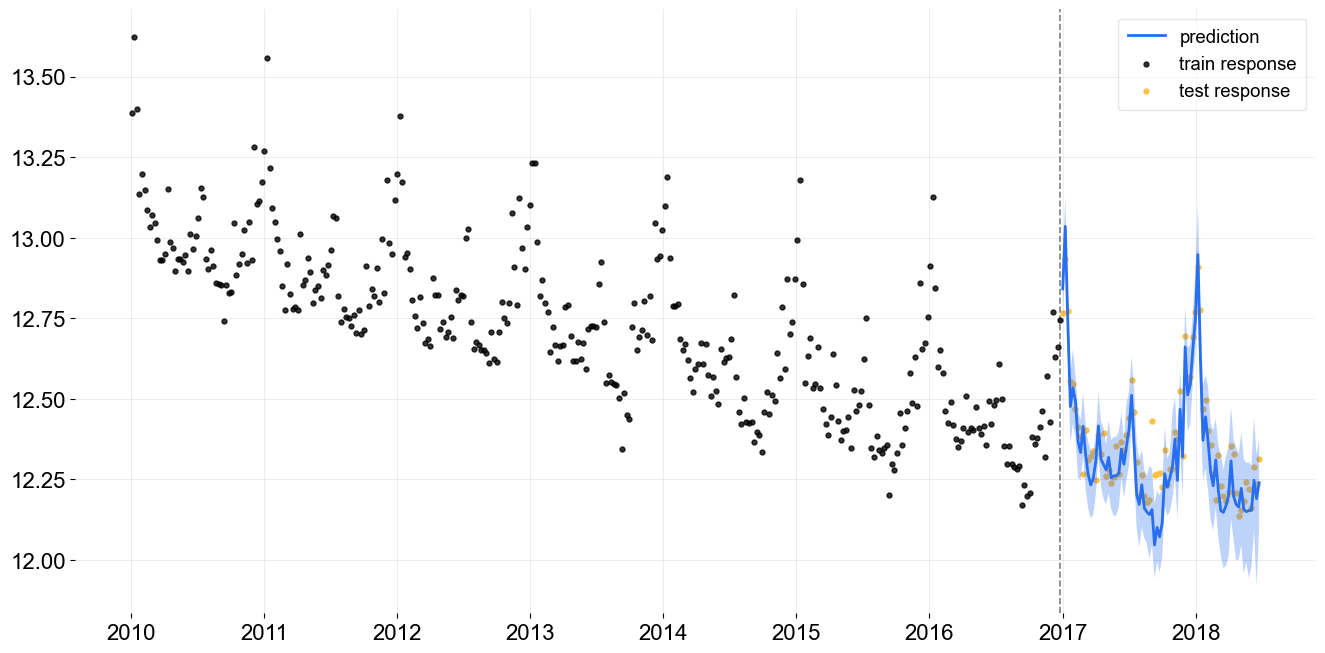

In [6]:
predicted_df = dlt.predict(df=test_df, decompose=True)

_ = plot_predicted_data(training_actual_df=train_df, predicted_df=predicted_df, 
                        date_col=dlt.date_col, actual_col=dlt.response_col,
                        test_actual_df=test_df)

## Plot Predicted Components

`plot_predicted_components` is the utility to plot each component separately. This is useful when one wants to look into the model prediction results and inspect each component separately.

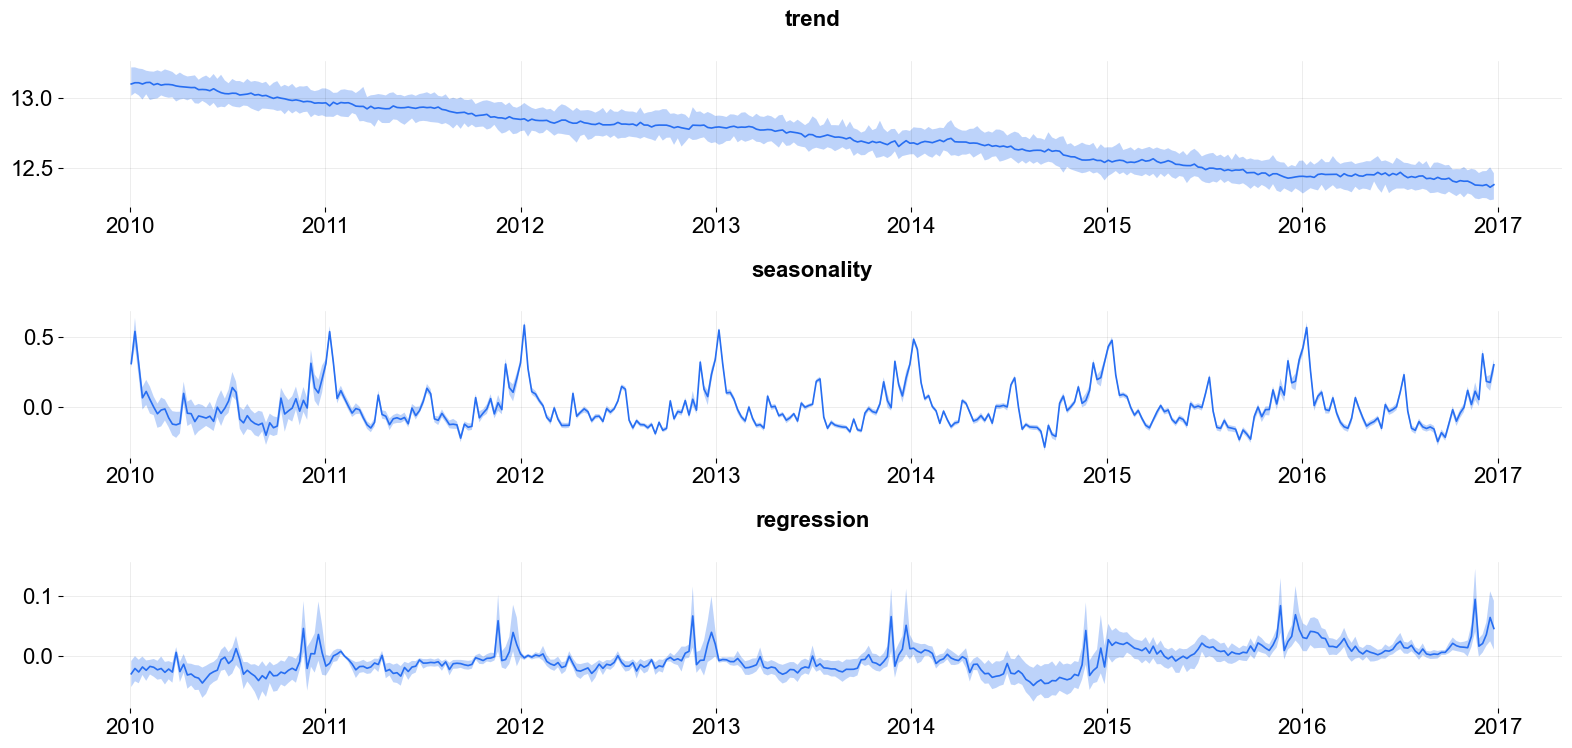

In [7]:
predicted_df = dlt.predict(df=train_df, decompose=True)

_ = plot_predicted_components(predicted_df, date_col)

One can use `plot_components` to have more componets to be plotted if they are available in the supplied predicted_df.

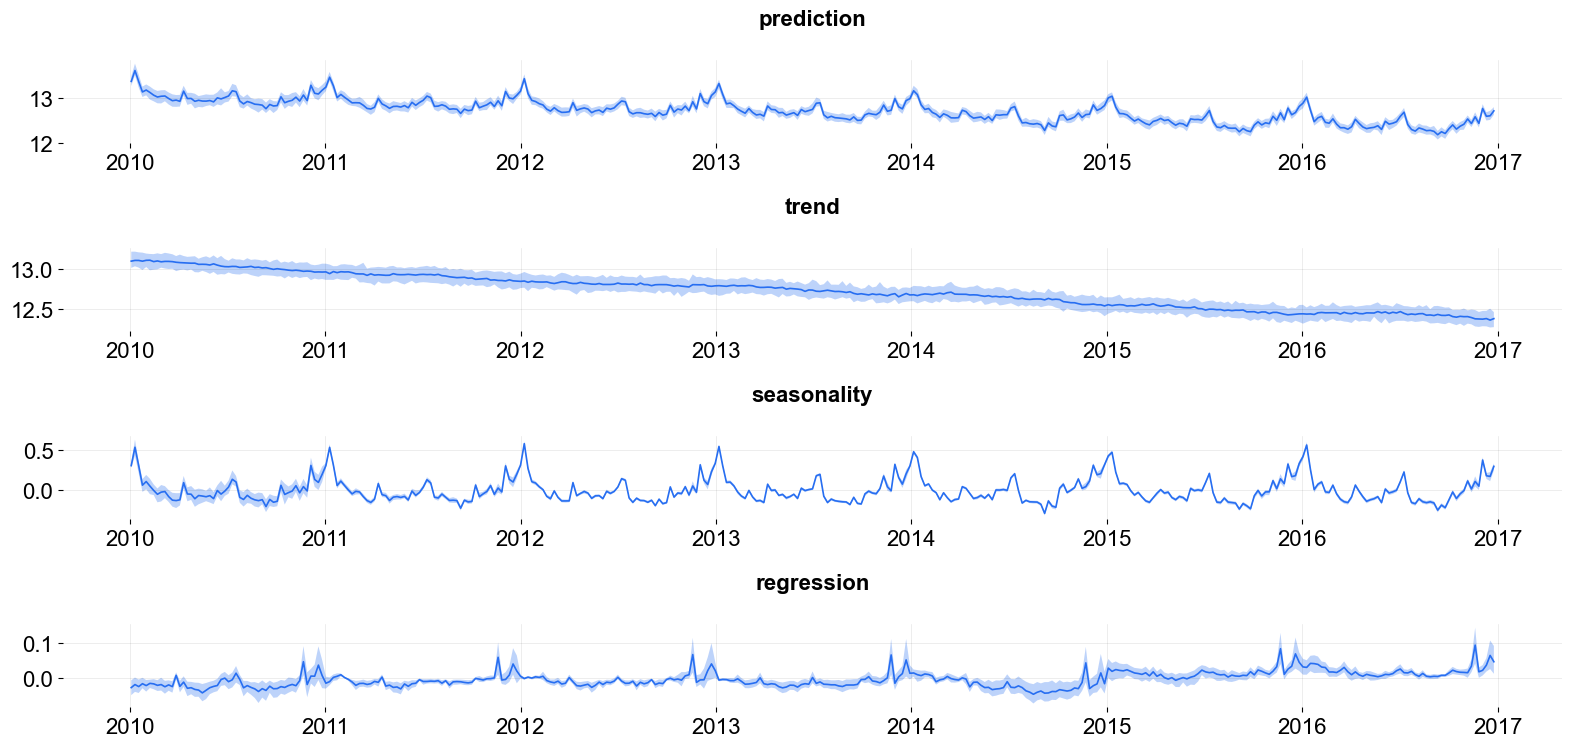

In [8]:
_ = plot_predicted_components(predicted_df, date_col, 
                              plot_components=['prediction', 'trend', 'seasonality', 'regression'])